# Ali Morajabi - HW1 - NNDL - 610300104
<hr><hr><hr>

## Downloading the Dataset
<hr><hr>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

100%|██████████| 66.0M/66.0M [00:03<00:00, 23.0MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
!ls /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


## Required Libraries
<hr><hr>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import tensorflow as tf

from collections import OrderedDict
import torch.nn as nn

In [ ]:
df = pd.read_csv(path + "/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
print(f"number of frauds => {df['Class'].sum()}")
print(f"number of normals => {(df['Class'] == 0).sum()}")

number of frauds => 492
number of normals => 284315


## Distribution of the Features
<hr><hr>

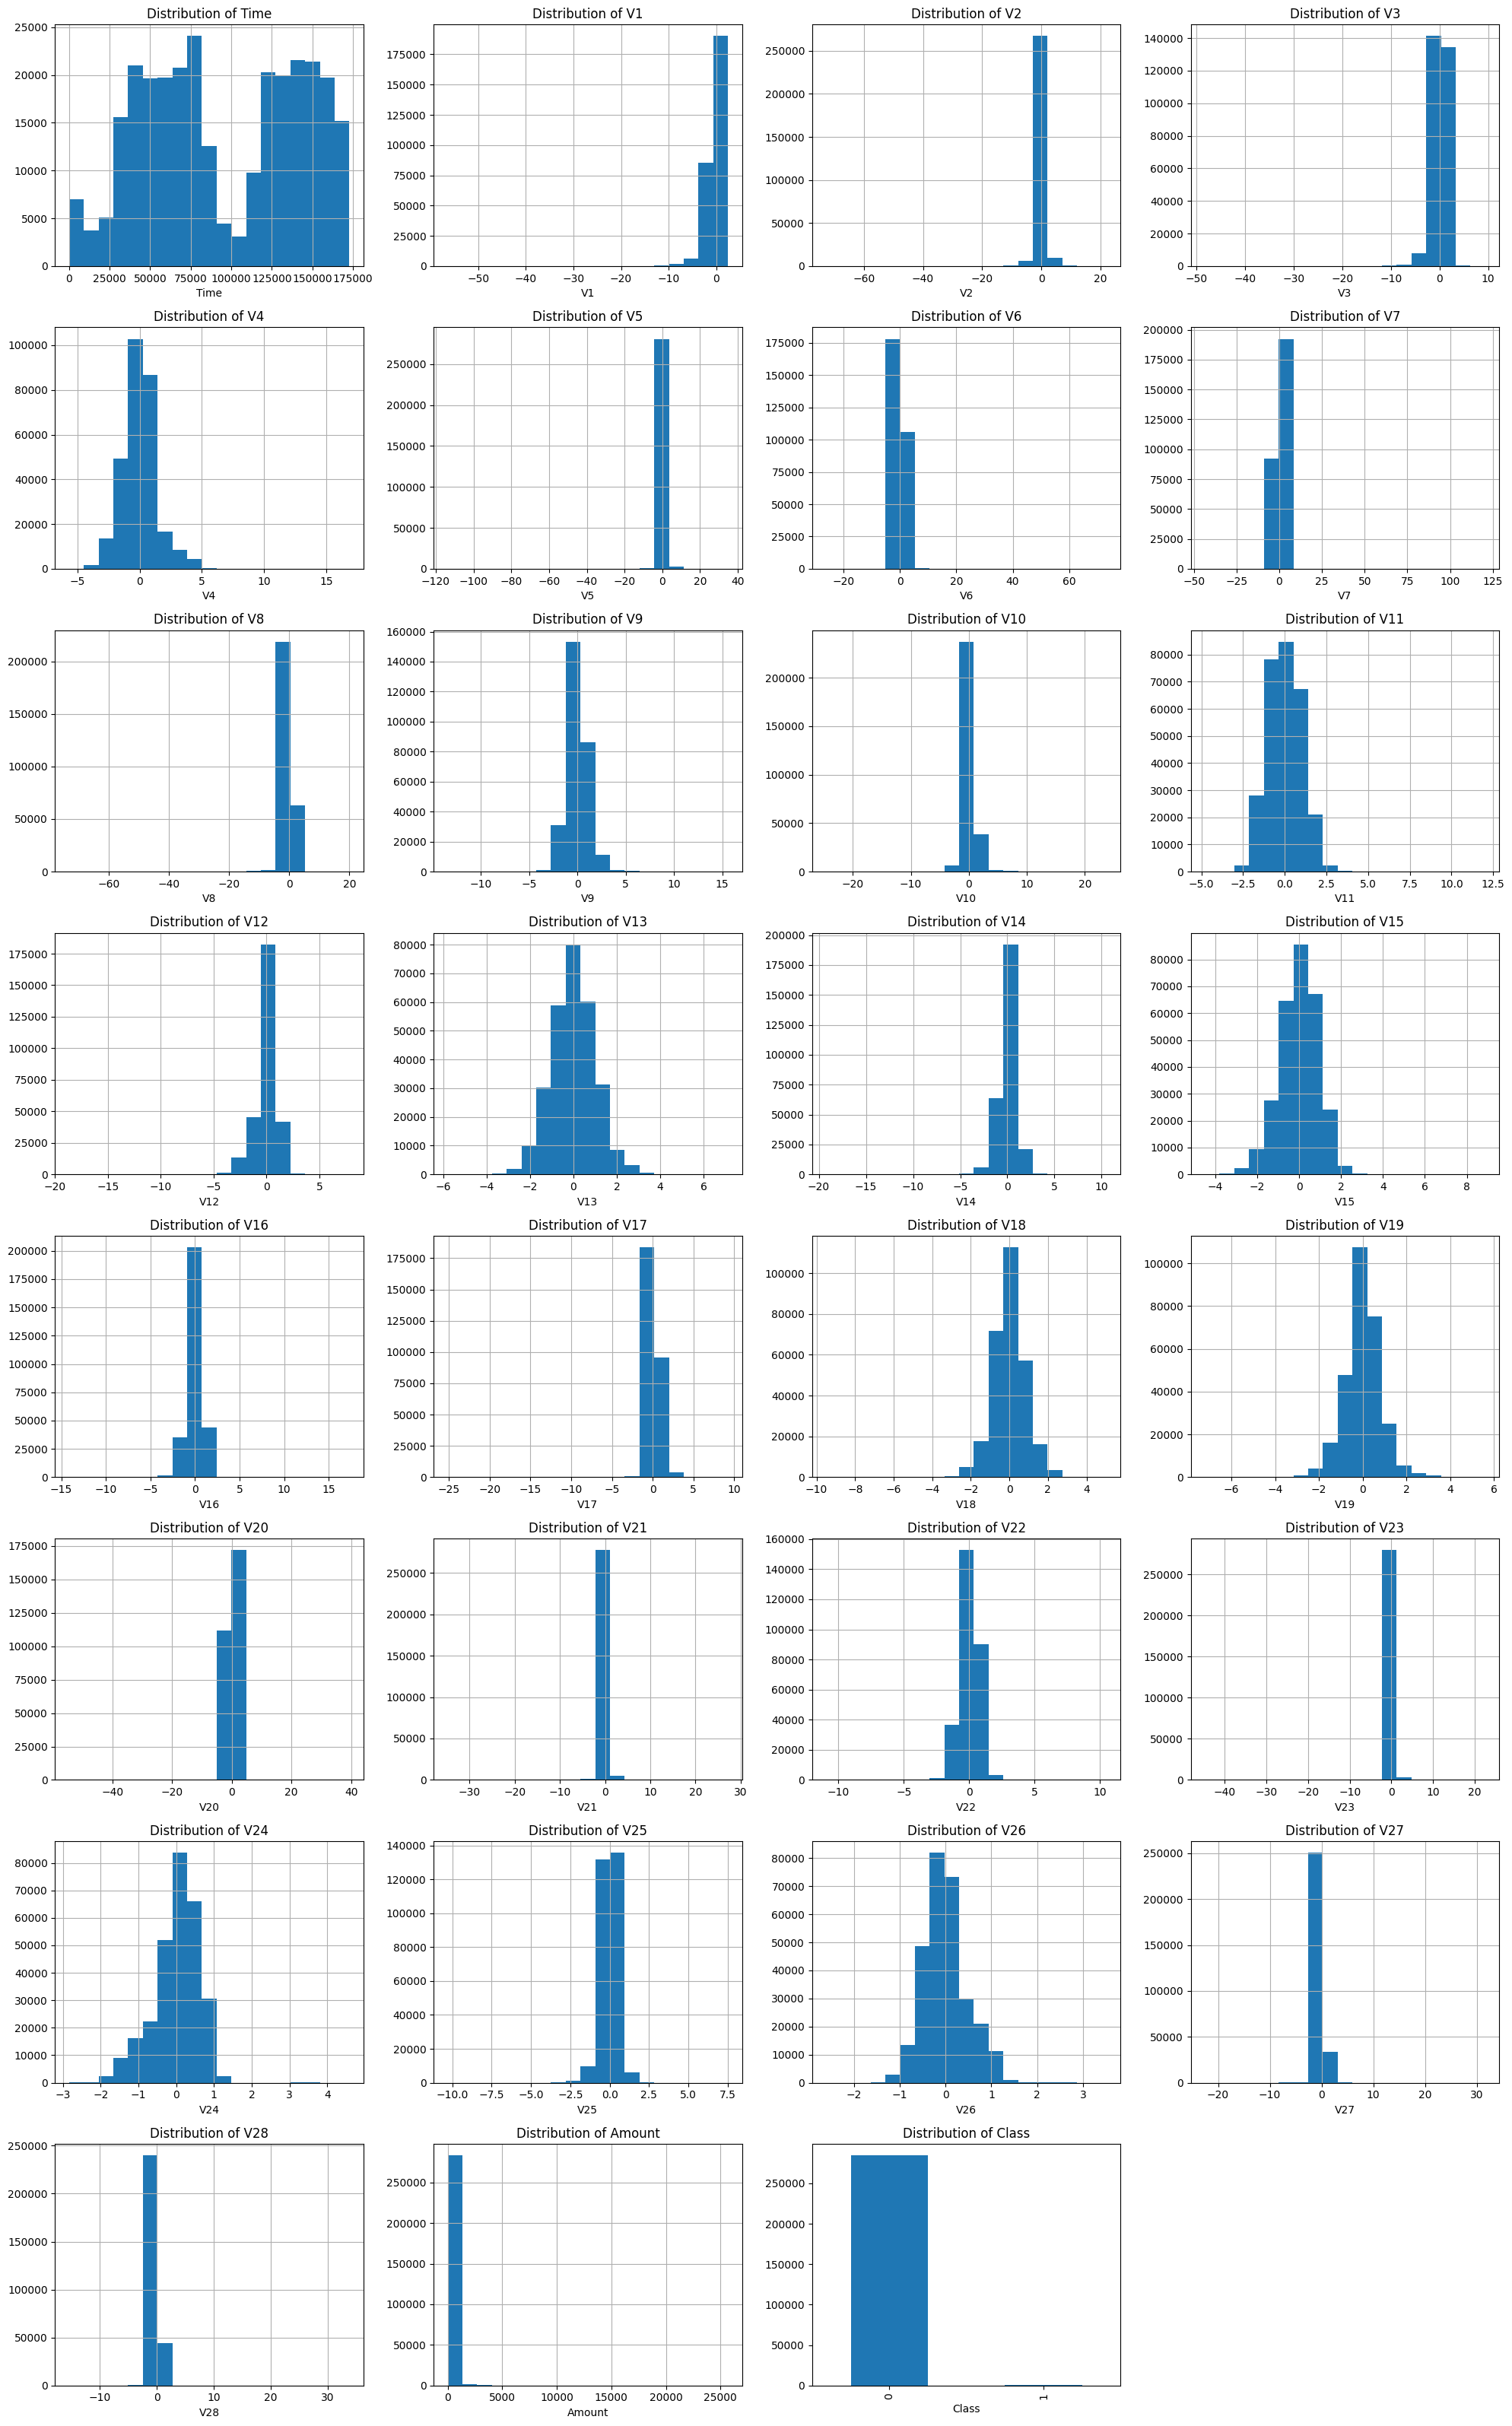

In [ ]:
cols_per_row = 4
num_cols = len(df.columns)
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    # As the type of the Class feature is 'int64' and others 'float64'
    if df[column].dtype == 'int64':
        df[column].value_counts().plot(kind='bar', ax=ax)
    else:
        num_bins = int(np.log2(len(df[column])) + 1)
        df[column].hist(bins=num_bins, ax=ax)

    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

As its visible the unbalancedness of the features could make the model into trouble; So we have to Normalize the features.

## Data Preprocessing
<hr><hr>

In [ ]:
# Normalization
def normalizer(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

X = df.drop(columns=["Class"])
y = df["Class"]

df_scaled = pd.DataFrame(normalizer(X), columns=X.columns)
df_scaled["Class"] = y.reset_index(drop=True)

df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [ ]:
# Splitting the data
X = df_scaled.drop(columns=["Class"])  # Feature
y = df_scaled["Class"]  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Train set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")

Train set: X_train=(199364, 30), y_train=(199364,)
Test set: X_test=(85443, 30), y_test=(85443,)


In [ ]:
# Showing that the split between train and test is balanced on classes.
print(f"The fraud portion of training data: {(y_train.sum() / X_train.shape[0])}")
print(f"The fraud portion of test data: {(y_test.sum() / X_test.shape[0])}")

The fraud portion of training data: 0.0017254870488152324
The fraud portion of test data: 0.0017321489179921118


<hr><hr>

In [ ]:
# Plot loss and accuracy
def loss_accuracy_plotter(models_hist, M):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(models_hist[M].history['loss'], label='Loss', color="red")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(models_hist[M].history['accuracy'], label='Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    plt.show()

In [ ]:
# Compute evaluation metrics
def evaluator(y_test, y_pred_labels):
    precision = precision_score(y_test, y_pred_labels)
    recall = recall_score(y_test, y_pred_labels)
    f1 = f1_score(y_test, y_pred_labels)
    accuracy = accuracy_score(y_test, y_pred_labels)
    conf_matrix = confusion_matrix(y_test, y_pred_labels)

    metrics_table = [
        ["Accuracy", f"{accuracy:.5f}"],
        ["Precision", f"{precision:.5f}"],
        ["Recall", f"{recall:.5f}"],
        ["F1 Score", f"{f1:.5f}"]
    ]
    print(tabulate(metrics_table, headers=["Metric", "Value"], tablefmt="grid"))

    conf_matrix_normalized = conf_matrix.astype(np.float32) / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    metrics_values = [accuracy, precision, recall, f1]
    metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
    sns.barplot(x=metrics_names, y=metrics_values, hue=metrics_names, palette="viridis", legend=False)
    plt.title("Model Metrics")
    plt.ylim(0, 1)
    for i, v in enumerate(metrics_values):
        plt.text(i, v + 0.02, f"{v:.5f}", ha='center', fontweight='bold')

    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix_normalized, annot=True, fmt=".5f", cmap="YlGnBu", cbar=True)
    plt.title("Normalized Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    plt.tight_layout()
    plt.show()



## First Model
A simple MLP model with one hidden layer containing 64 neurons and 1 neuron in the output layer.
<hr><hr>

### Dropout ❌ | Regularization ❌ (nDnR)
<hr>

In [ ]:
models_hist = dict()
models = dict()

In [ ]:
if tf.config.experimental.list_physical_devices('GPU'):
    print("Using GPU...")
    device = '/GPU:0'
else:
    print("Using CPU...")
    device = '/CPU:0'

with tf.device(device):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    models['nDnR'] = model
    models_hist['nDnR'] = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)


Using GPU...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9914 - loss: 0.0416
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9994 - loss: 0.0031
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0024
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9995 - loss: 0.0020
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9995 - loss: 0.0019
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 7/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9996 - loss: 0.0018
Epoch 8/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9996 - loss: 0.0017
Epoch 9/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9995 - loss: 0.0018
Epoch 10/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9996 - loss: 0.0016
Epoch 11/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9996 - loss: 0.0016
Epoch 12/40
6231/62

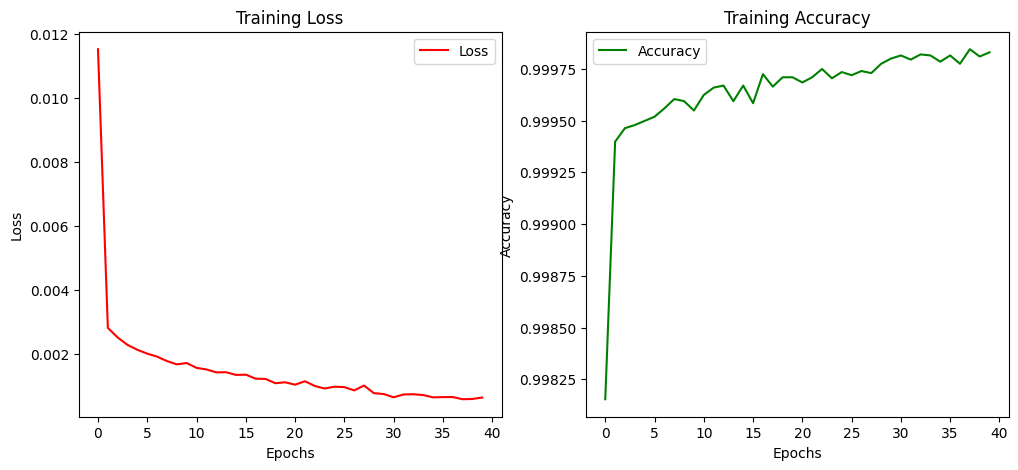

In [ ]:
loss_accuracy_plotter(models_hist, 'nDnR')

In [ ]:
# Evaluate the model
loss, accuracy = models['nDnR'].evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = models['nDnR'].predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9994 - loss: 0.0102
Test Loss: 0.0083, Test Accuracy: 0.9994
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  | 0.9994  |
+-----------+---------+
| Precision | 0.87023 |
+-----------+---------+
| Recall    | 0.77027 |
+-----------+---------+
| F1 Score  | 0.8172  |
+-----------+---------+


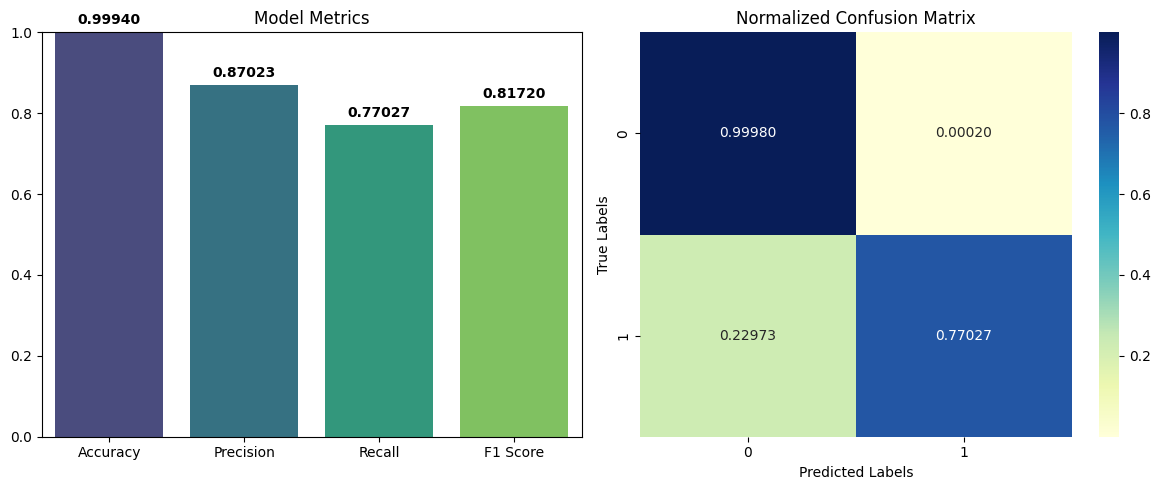

In [ ]:
evaluator(y_test, y_pred_labels)

### Dropout ✅ | Regularization ❌ (DnR)
<hr>

In [ ]:
with tf.device(device):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    models['DnR'] = model
    models_hist['DnR'] = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)


Using GPU...
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9953 - loss: 0.0328
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9993 - loss: 0.0035
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9995 - loss: 0.0028
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0030
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0028
Epoch 7/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0023
Epoch 8/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0028
Epoch 9/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 10/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0028
Epoch 11/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0028
Epoch 12/40
6231/6231 ━━━━━━━━

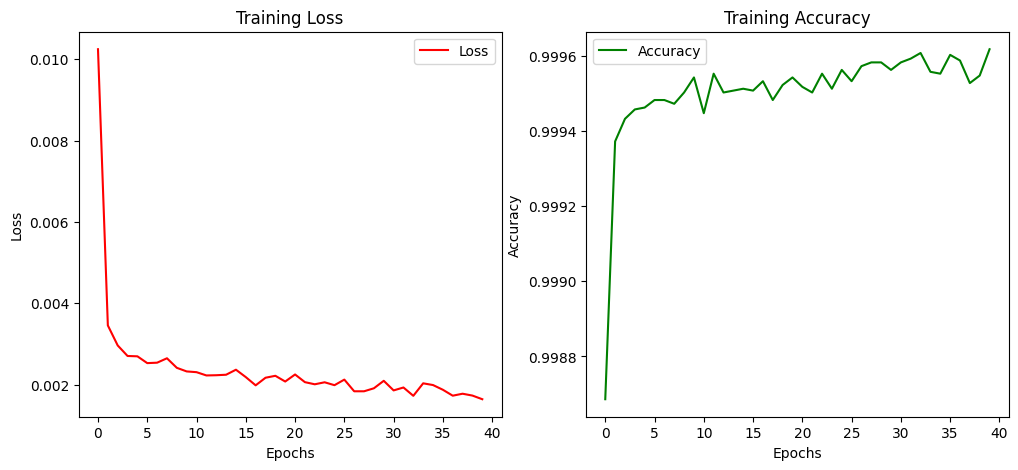

In [ ]:
loss_accuracy_plotter(models_hist, 'DnR')

In [ ]:
# Evaluate the model
loss, accuracy = models['DnR'].evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = models['DnR'].predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0069
Test Loss: 0.0059, Test Accuracy: 0.9993
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  | 0.99934 |
+-----------+---------+
| Precision | 0.83824 |
+-----------+---------+
| Recall    | 0.77027 |
+-----------+---------+
| F1 Score  | 0.80282 |
+-----------+---------+


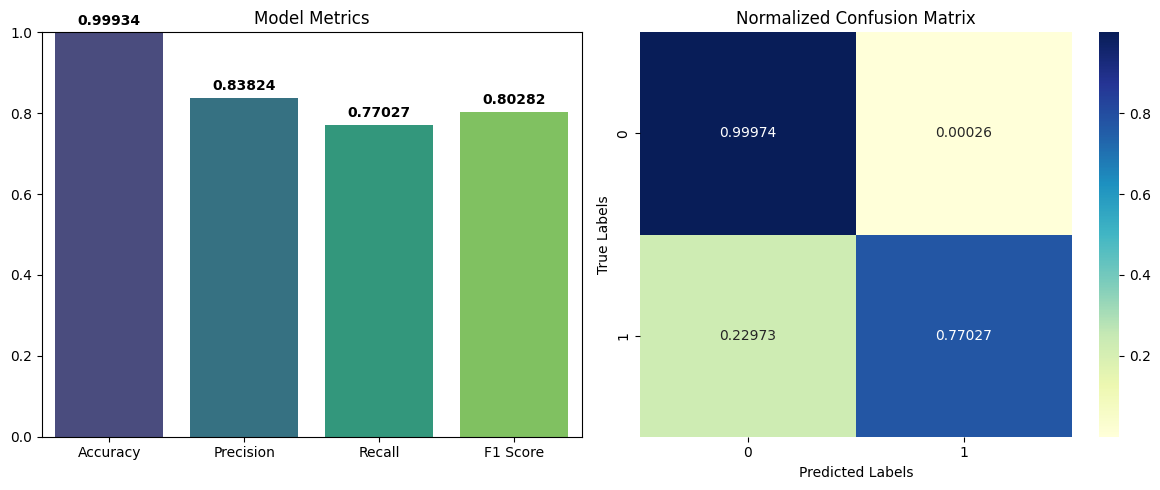

In [ ]:
evaluator(y_test, y_pred_labels)

### Dropout ❌ | Regularization ✅ (nDR)
<hr>

In [ ]:
with tf.device(device):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(30,), kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    models['nDR'] = model
    models_hist['nDR'] = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9712 - loss: 0.0722
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9994 - loss: 0.0043
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9993 - loss: 0.0044
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9993 - loss: 0.0033
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9995 - loss: 0.0031
Epoch 7/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9994 - loss: 0.0036
Epoch 8/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9993 - loss: 0.0036
Epoch 9/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 10/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0029
Epoch 11/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0031
Epoch 12/40
6231/6231 ━━━━━━━━

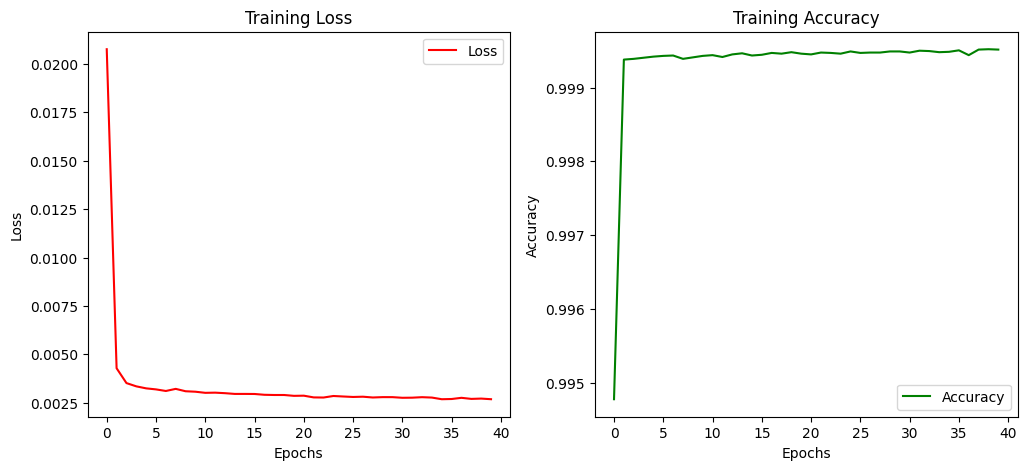

In [ ]:
loss_accuracy_plotter(models_hist, 'nDR')

In [ ]:
# Evaluate the model
loss, accuracy = models['nDR'].evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = models['nDR'].predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9994 - loss: 0.0036
Test Loss: 0.0037, Test Accuracy: 0.9994
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  | 0.99936 |
+-----------+---------+
| Precision | 0.83942 |
+-----------+---------+
| Recall    | 0.77703 |
+-----------+---------+
| F1 Score  | 0.80702 |
+-----------+---------+


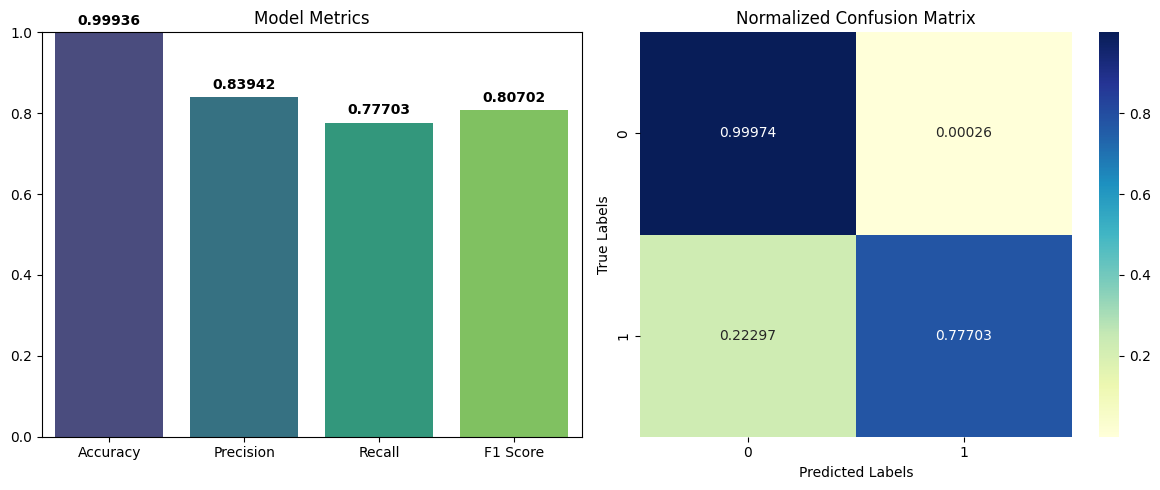

In [ ]:
evaluator(y_test, y_pred_labels)

### Dropout ✅ | Regularization ✅ (DR)
<hr>

In [ ]:
with tf.device(device):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(30,),
                              kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    models['DR'] = model
    models_hist['DR'] = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9815 - loss: 0.0603
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0048
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9995 - loss: 0.0038
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9993 - loss: 0.0042
Epoch 7/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 8/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 9/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0030
Epoch 10/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9994 - loss: 0.0033
Epoch 11/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0030
Epoch 12/40
6231/6231 ━━━━━━━━

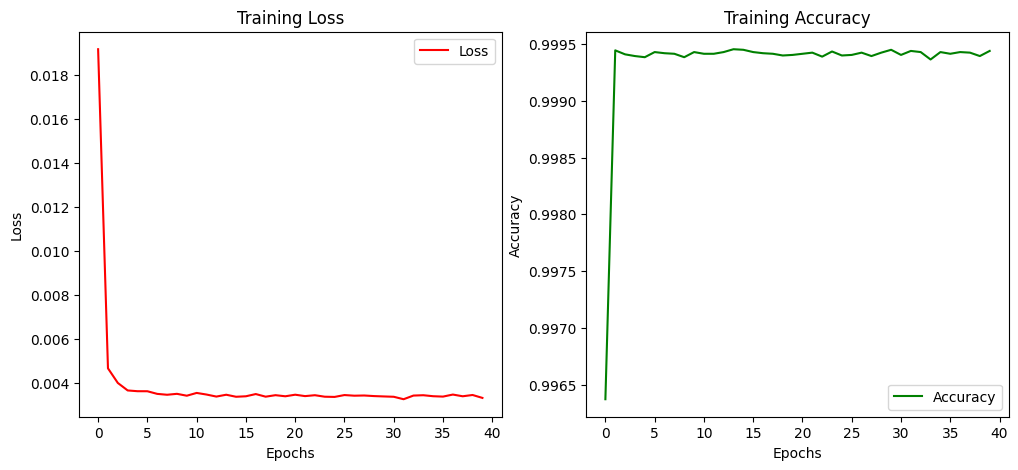

In [ ]:
loss_accuracy_plotter(models_hist, 'DR')

In [ ]:
loss, accuracy = models['DR'].evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

y_pred = models['DR'].predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9993 - loss: 0.0041
Test Loss: 0.0041, Test Accuracy: 0.9993
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  | 0.99933 |
+-----------+---------+
| Precision | 0.84733 |
+-----------+---------+
| Recall    | 0.75    |
+-----------+---------+
| F1 Score  | 0.7957  |
+-----------+---------+


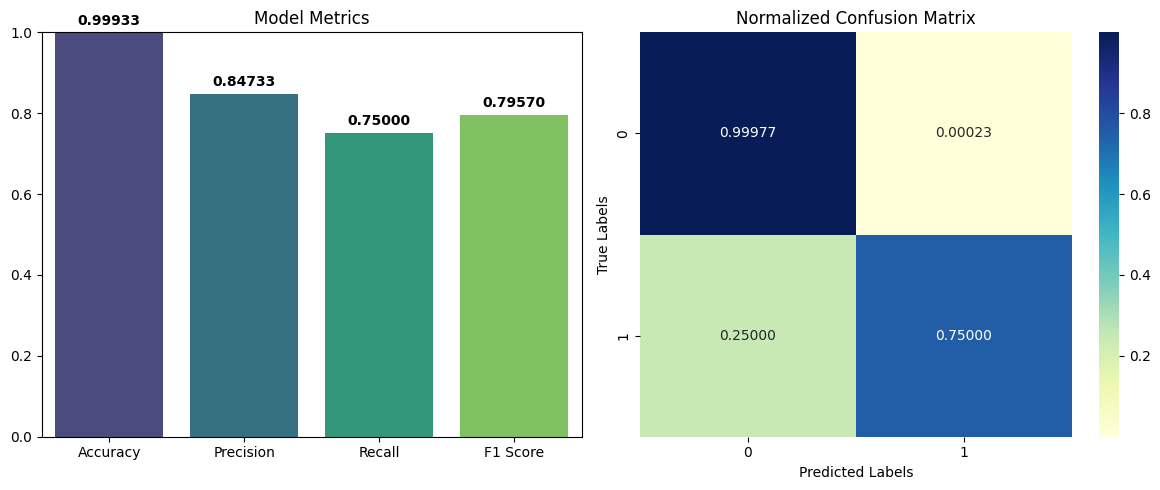

In [ ]:
evaluator(y_test, y_pred_labels)

## Second Model (sec)
<hr>

In [ ]:
with tf.device(device):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(30,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    models['sec'] = model
    models_hist['sec'] = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9972 - loss: 0.0216
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9994 - loss: 0.0045
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9995 - loss: 0.0031
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0030
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9994 - loss: 0.0036
Epoch 7/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 8/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9994 - loss: 0.0033
Epoch 9/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9996 - loss: 0.0028
Epoch 10/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9996 - loss: 0.0026
Epoch 11/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9995 - loss: 0.0029
Epoch 12/40
6231/6231 ━━━━━━━━

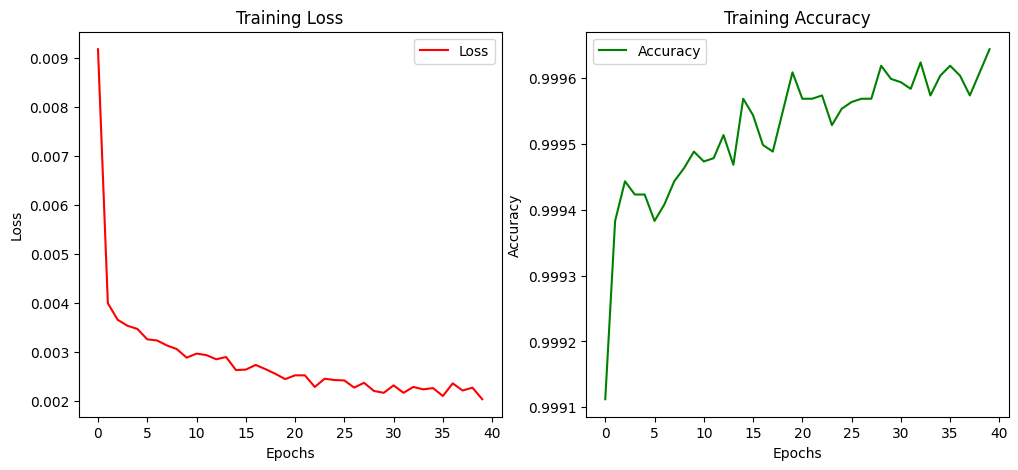

In [ ]:
loss_accuracy_plotter(models_hist, 'sec')

In [ ]:
# Evaluate the model
loss, accuracy = models['sec'].evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = models['sec'].predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9994 - loss: 0.0057
Test Loss: 0.0051, Test Accuracy: 0.9994
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  | 0.99937 |
+-----------+---------+
| Precision | 0.85075 |
+-----------+---------+
| Recall    | 0.77027 |
+-----------+---------+
| F1 Score  | 0.80851 |
+-----------+---------+


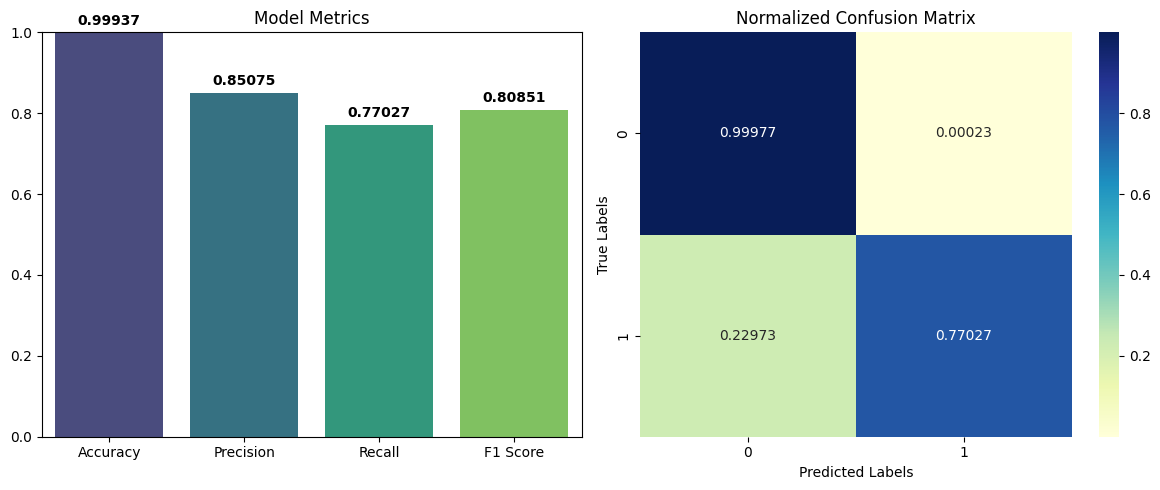

In [ ]:
evaluator(y_test, y_pred_labels)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


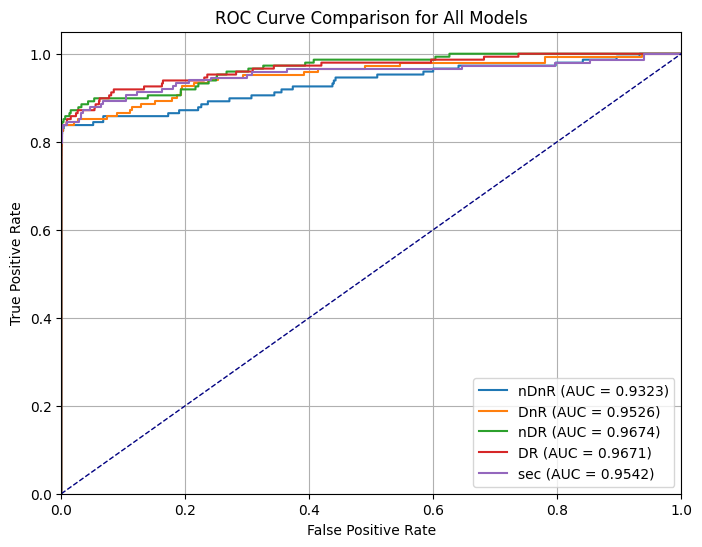

In [ ]:
y_pred_prob_nDnR = models['nDnR'].predict(X_test)
y_pred_prob_DnR = models['DnR'].predict(X_test)
y_pred_prob_nDR = models['nDR'].predict(X_test)
y_pred_prob_DR = models['DR'].predict(X_test)
y_pred_prob_sec = models['sec'].predict(X_test)

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))

for y_pred, model_name in zip([y_pred_prob_nDnR, y_pred_prob_DnR, y_pred_prob_nDR, y_pred_prob_DR, y_pred_prob_sec],
                              ['nDnR', 'DnR', 'nDR', 'DR', 'sec']):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Grid Search for Hyperparameters
<hr><hr>

In [ ]:
def GS(neuron_num, dropout_rates, l2_params, batch_sizes):
    results = {}

    for neurons in neuron_num:
        for dropout in dropout_rates:
            for l2 in l2_params:
                for batch_size in batch_sizes:
                    model = tf.keras.Sequential([
                        tf.keras.layers.Dense(neurons, activation='relu', input_shape=(30,),
                                              kernel_regularizer=tf.keras.regularizers.l2(l2)),
                        tf.keras.layers.Dropout(dropout),
                        tf.keras.layers.Dense(1, activation='sigmoid')
                    ])

                    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                    model.fit(X_train, y_train, epochs=40, batch_size=batch_size, verbose=0)

                    results[f'{neurons}-{dropout}-{l2}-{batch_size}'] = model

    return results

In [ ]:
results = GS([64, 128, 256], [0.2, 0.3, 0.4], [0.001, 0.0001], [16, 32, 64])

print("Grid Search done!")

Grid Search done!


In [ ]:
def select_best_model(results):
    best_config = str()
    best_f1 = int()

    for config, model in results.items():
        y_pred = model.predict(X_test)
        y_pred_binary = (y_pred > 0.5).astype(int)

        f1 = f1_score(y_test, y_pred_binary)
        if (f1 > best_f1):
            best_f1 = f1
            best_config = config

    return best_config

In [ ]:
best_config = select_best_model(results)
print(best_config)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 960us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 963us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 967us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 961us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 964us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 960us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 968us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 967us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 996us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 991us/step
2671/2671 ━━━━━━━━━━━━━━━━

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  | 0.99943 |
+-----------+---------+
| Precision | 0.88976 |
+-----------+---------+
| Recall    | 0.76351 |
+-----------+---------+
| F1 Score  | 0.82182 |
+-----------+---------+


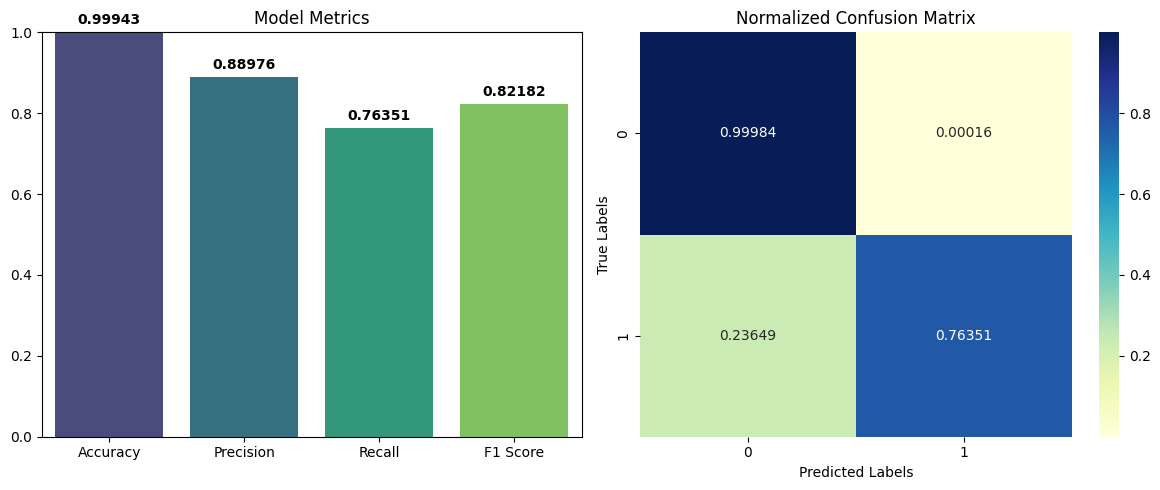

In [ ]:
y_pred = results[best_config].predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

evaluator(y_test, y_pred_labels)

# Neural Nets vs. Logistic Regression
<hr><hr>

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  | 0.99912 |
+-----------+---------+
| Precision | 0.84762 |
+-----------+---------+
| Recall    | 0.60135 |
+-----------+---------+
| F1 Score  | 0.70356 |
+-----------+---------+


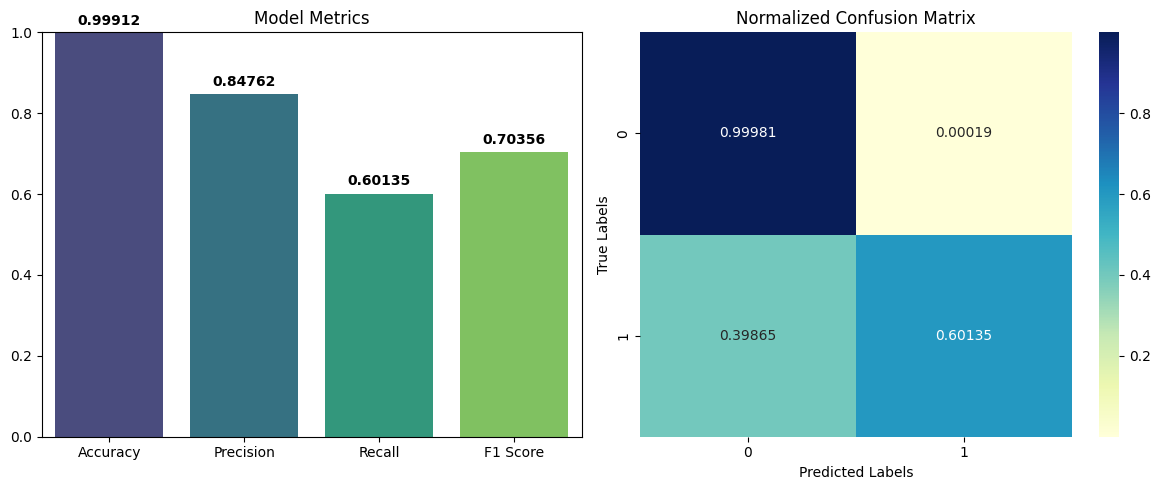

In [ ]:
evaluator(y_test, y_pred_labels)